In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 14,
          'figure.figsize': (5, 5),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params) 

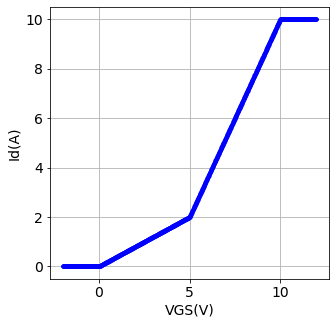

In [6]:
# Defino la transferencia del dispositivo
def idi(v):
    i =  0.             if (v < 0) else 0
    i = (2/5)*(v)       if (v >= 0  and v < 5) else i
    i = (8/5)*(v-5)+2   if (v >= 5  and v < 10) else i
    i = (10) if (v >= 10  ) else i
    return i


# Grafico para verificar!
vgsa = np.arange(-2,12,0.01)
idsa = np.array([idi(v) for v in vgsa])

plt.plot(vgsa,idsa,'b.')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Id(A)')
plt.xlabel('VGS(V)')
plt.show()

In [16]:
# Tensión Fuente
VDD  = 110
# Tension minima 
Vmin = 10
# Tension entrada 
VGG = 0
vg  = 5
m   = 0.8
# Filtro salida
Qo  = np.inf
Qc  = 10

# Frecuencia de trabajo
fc = 1e6



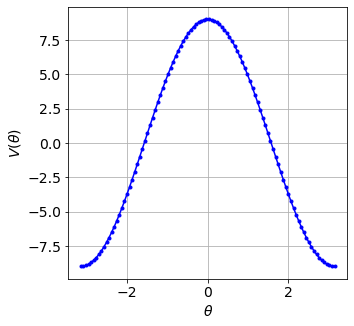

In [70]:
# Tensión entrada
# defino el sampleo
n  =100
# vector de tiempo 
th  = np.pi*np.linspace(-1, 1, num=n)

vgs = VGG + vg*(1+m) * np.cos(th)



plt.plot(th, vgs,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('$V(\\theta)$')
plt.xlabel('$\\theta$')
plt.show()



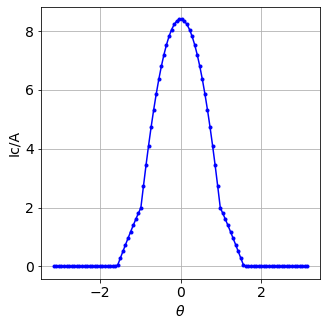

In [71]:
# Corriente de salida
ids = np.array([idi(v) for v in vgs])

plt.plot(th, ids,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic/A')
plt.xlabel('$\\theta$')
plt.show()



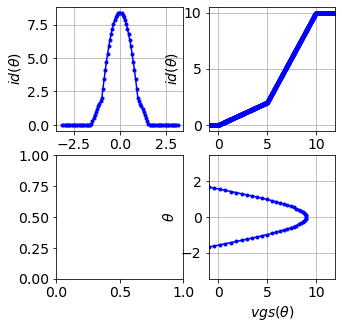

In [72]:
#Oscilogramas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# Plot various projections of the samples.
ax1.plot(th, ids, 'b.-')
ax1.grid(True)
ax1.set(xlabel='$\\theta$', ylabel='$id(\\theta)$')


ax2.plot(vgsa, idsa, 'b.-')
ax2.grid(True)
ax2.set(xlabel='$vgs(\\theta)$', ylabel='$id(\\theta)$')
ax2.set(xlim=(-1, 12))

ax4.plot(vgs,th, 'b.-')
ax4.set(xlabel='$vgs(\\theta)$', ylabel='$\\theta$')
ax4.set
ax4.grid(True)
ax4.set(xlim=(-1, 12))

plt.show()


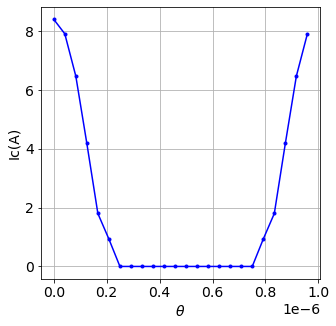

In [75]:
# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables
fs = 24*fc
ds = 1/fs

# vector de tiempo 
# Defino resolución espectral en frecuencia !
numT  = 1
T     = numT/fc
time  = np.arange(0,T,ds)


vgs = VGG + vg *(1+m)* np.cos(2*np.pi*fc*time)

idst = np.array([idi(v) for v in vgs])

plt.plot(time, idst,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


Id0 = 2.125 A
Id1 = 3.590 A
Id2 = 2.096 A


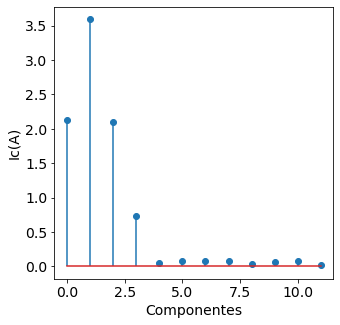

In [76]:
# Transformada Discreta de Fourier    
# Se calcula a modo ejemplo con objetivos didacticos (no es la forma optima!)
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 

# Calculo las componentes de la serie de Fourier

Idsf = DFT(idst)

print('Id0 = {:1.3f} A'.format(abs(Idsf[0]   ) ) )
print('Id1 = {:1.3f} A'.format(abs(Idsf[numT]) ) )
print('Id2 = {:1.3f} A'.format(abs(Idsf[2*numT]) ) )
# Grafico
plt.stem(abs(Idsf) )
plt.ylabel('Ic(A)')
plt.xlabel('Componentes')
plt.show()



In [23]:
# Calculo resistencia de carga para max excursion de salida

Rd  = (VDD -  Vmin)/abs(Idsf[numT]) 

L   = (1/Qc-1/Qo)*Rd/(2*np.pi*fc)

C   = 1/(L*(2*np.pi*fc)**2)

print('.param Rd = {:1.2f}'.format(abs(Rd)))

print('.param L = {:1.4e}'.format(abs(L)))
print('.param C = {:1.4e}'.format(abs(C)))



.param Rd = 27.96
.param L = 4.4503e-07
.param C = 5.6919e-08


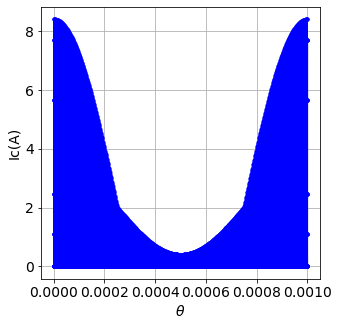

In [28]:
# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables
fm = 1e3
fc = 1e6
fs = 20*fc
ds = 1/fs

# vector de tiempo 
# Defino resolución espectral en frecuencia !
numT  = 1
T     = numT/fm
time  = np.arange(0,T,ds)


vgs = VGG + vg *(1+m*np.cos(2*np.pi*fm*time))* np.cos(2*np.pi*fc*time)

idst = np.array([idi(v) for v in vgs])

plt.plot(time, idst,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


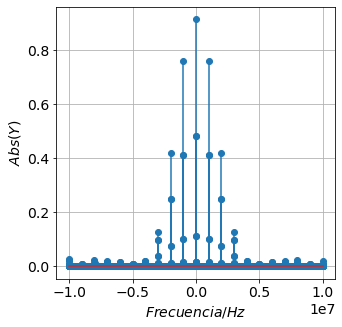

In [29]:
## Calculo del espectro empleando la funciones de scipy.fftpack  (fft, fftfreq)
#Se emplea mide el tiempo de computo de la función con fines de comparación. 

Y = fft(idst)/len(idst)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(idst), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 0.8)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

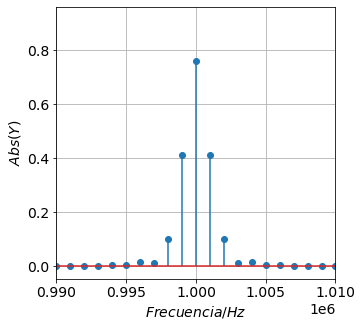

In [30]:
plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.xlim(0.99e6, 1.01e6)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

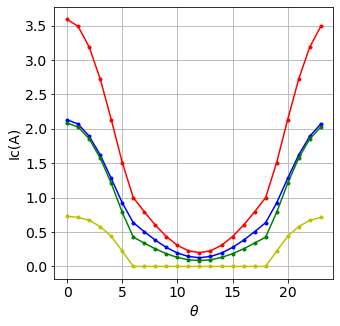

In [80]:
# Transformada Discreta de Fourier    
# Se calcula a modo ejemplo con objetivos didacticos (no es la forma optima!)
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 


# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables


# vector de tiempo 
# Defino resolución espectral en frecuencia !
numS  = 24
ds   = 1/numS
th   = np.pi*np.arange(-1,1,1/numS)

Id0 = list()
Id1 = list()
Id2 = list()
Id3 = list()
# Calculo las componentes de la serie de Fourier
for i in range(24):
    vgs = VGG + vg *(1+m*np.cos(2*np.pi/numS*i))* np.cos(th)

    idst = np.array([idi(v) for v in vgs])
    Idsf = DFT(idst)

    Id0.append(abs(Idsf[0]) ) 
    Id1.append(abs(Idsf[1]) ) 
    Id2.append(abs(Idsf[2]) ) 
    Id3.append(abs(Idsf[3]) ) 
    
    
plt.plot(Id0,'b.-')
plt.plot(Id1,'r.-')
plt.plot(Id2,'g.-')
plt.plot(Id3,'y.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

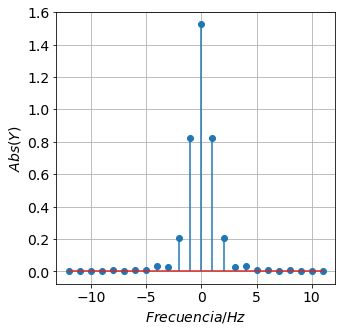

In [40]:
Y = fft(Id1)/len(Id1)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(Id1), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 0.8)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

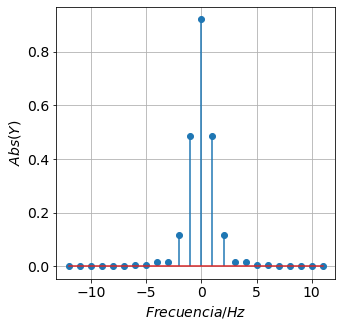

In [41]:
Y = fft(Id0)/len(Id0)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(Id0), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 0.8)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

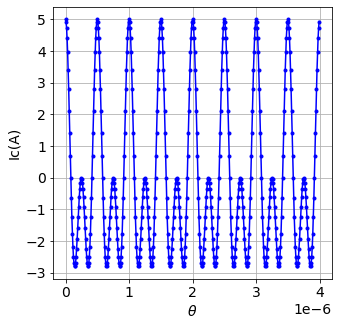

In [64]:
# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables
f1 = 2e6
f2 = 4e6
fs = 20*(f1+f2)
ds = 1/fs

# vector de tiempo 
# Defino resolución espectral en frecuencia !
numT  = 4
T     = numT/1e6
time  = np.arange(0,T,ds)


vgs = VGG + vg *(np.cos(2*np.pi*f1*time)+np.cos(2*np.pi*f2*time))/2

plt.plot(time, vgs,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

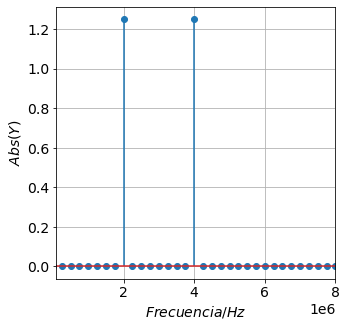

In [65]:
Y = fft(vgs)/len(vgs)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(vgs), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.xlim(0.1e6, 8e6)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

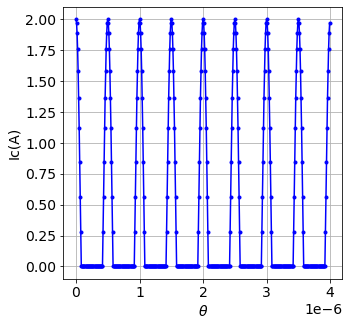

In [66]:

idst = np.array([idi(v) for v in vgs])

plt.plot(time, idst,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

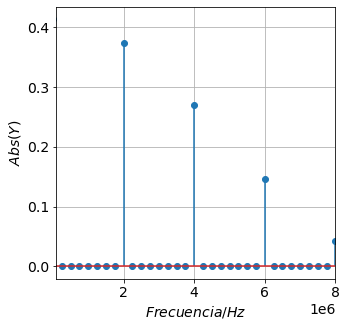

In [67]:
Y = fft(idst)/len(idst)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(idst), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.xlim(0.1e6, 8e6)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()